1. Repeat question 1 on worksheet 2 but add a polynomial fit line and a moving average line.
Have a look at the following for different ways of fitting a polynomial curve
https://towardsdatascience.com/polynomial-regression-which-python-package-to-use-78a09b0ac87b
It might be worth creating functions for each of the lines of fit and plotting serveral!

In [1]:
# open HADSST4_timeseries.csv and determine if there's a trend
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [17]:
# Open file and define variables
df = pd.read_csv('/Users/bendixon/Documents/GitHub/climate/HadSST4_timeseries.csv')
year = df['year']; anomaly = df['anomaly']

[Text(0, 0.5, 'SST in deg C'), Text(0.5, 1.0, 'SST Anomaly over time')]

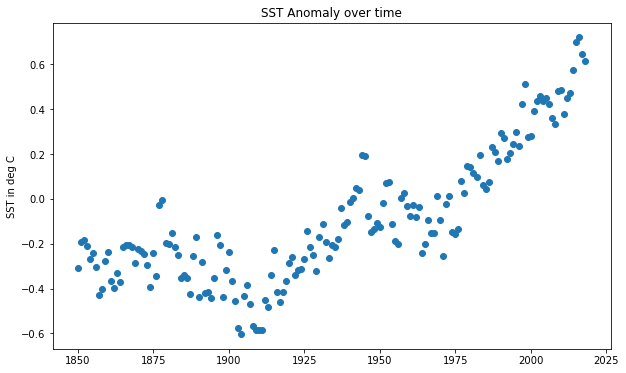

In [20]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(year,anomaly); ax.set(Title='SST Anomaly over time',ylabel='SST in deg C')

In [21]:
# linear regression
scipy.stats.linregress(year, anomaly)

LinregressResult(slope=0.004841754164387647, intercept=-9.459063204813283, rvalue=0.802516270257719, pvalue=2.6720630467440723e-39, stderr=0.00027854534839969993)

Text(0.5, 1.0, 'Global SST temperature anomaly')

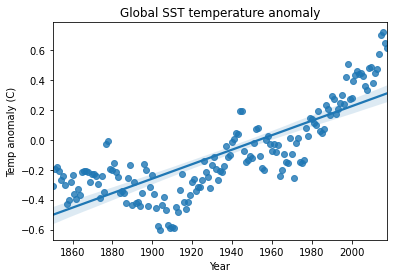

In [24]:
# Using seaborn's inbuilt regression plot
import seaborn as sns
ax2 = sns.regplot(year, anomaly)
ax2.set_xlabel('Year')
ax2.set_ylabel('Temp anomaly (C)')
ax2.set_title('Global SST temperature anomaly')